# Ford Bike Data
## by Nicholas Lucasti

## Preliminary Wrangling

This document explores a dataset containing bikeshare data for approximately 210,000 trips in August of 2019.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from geopy.distance import geodesic
from datetime import date
import calendar
%matplotlib inline

In [2]:
#Load in dataset
ford = pd.read_csv('ford_201908.csv')

In [3]:
#Overview of data
print('Shape\n')
print(ford.shape)
print(40*'-')
print('Data Types\n')
print(ford.dtypes)

Shape

(210563, 16)
----------------------------------------
Data Types

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [4]:
#Data structure
ford.head()

duration_sec                start_time                  end_time  \
0         68145  2019-08-31 21:27:42.2530  2019-09-01 16:23:27.4920   
1         53216  2019-08-31 22:34:17.5120  2019-09-01 13:21:13.9310   
2         53182  2019-08-31 22:34:49.9420  2019-09-01 13:21:12.4570   
3         75682  2019-08-31 14:22:02.2780  2019-09-01 11:23:24.5110   
4         30849  2019-08-31 18:47:08.0570  2019-09-01 03:21:17.6970   

   start_station_id         start_station_name  start_station_latitude  \
0               249  Russell St at College Ave               37.858473   
1               368       Myrtle St at Polk St               37.785434   
2               368       Myrtle St at Polk St               37.785434   
3               104          4th St at 16th St               37.767045   
4               327  5th St at San Salvador St               37.332039   

   start_station_longitude  end_station_id           end_station_name  \
0              -122.253253             247  Fulton St at Bancroft Way   
1              -122.419622              78        Folsom St at 9th St   
2              -122.419622              78        Folsom St at 9th St   
3              -122.390833             126                Esprit Park   
4              -121.881766             327  5th St at San Salvador St   

   end_station_latitude  end_station_longitude  bike_id   user_type  \
0             37.867789            -122.265896     3112    Customer   
1             37.773717            -122.411647     2440    Customer   
2             37.773717            -122.411647     9743    Customer   
3             37.761634            -122.390648    11418  Subscriber   
4             37.332039            -121.881766     1553    Customer   

   member_birth_year member_gender bike_share_for_all_trip  
0                NaN           NaN                      No  
1             1993.0        Female                      No  
2             1995.0          Male                      No  
3             1993.0        Female                      No  
4                NaN           NaN                      No

In [5]:
ford.describe()

duration_sec  start_station_id  start_station_latitude  \
count  210563.00000     210563.000000           210563.000000   
mean      833.51472        144.829481               37.770058   
std      1928.22378        120.128023                0.102810   
min        61.00000          3.000000               37.311284   
25%       376.00000         50.000000               37.770407   
50%       593.00000        104.000000               37.780526   
75%       914.00000        240.000000               37.795393   
max     85492.00000        459.000000               45.510000   

       start_station_longitude  end_station_id  end_station_latitude  \
count            210563.000000   210563.000000         210563.000000   
mean               -122.354407      140.921145             37.770268   
std                   0.217648      118.990674              0.102675   
min                -122.473658        3.000000             37.311284   
25%                -122.412408       44.000000             37.770407   
50%                -122.398285       99.000000             37.780787   
75%                -122.294837      233.000000             37.797280   
max                 -73.570000      459.000000             45.510000   

       end_station_longitude        bike_id  member_birth_year  
count          210563.000000  210563.000000      170774.000000  
mean             -122.353604    4048.755897        1984.964450  
std                 0.217245    3639.124465          10.037432  
min              -122.473658      12.000000        1878.000000  
25%              -122.411306    1312.000000        1980.000000  
50%              -122.397437    2629.000000        1987.000000  
75%              -122.294837    9241.000000        1992.000000  
max               -73.570000   11945.000000        2001.000000

### What is the structure of your dataset?

There are 210,563 different trips throughout August 2019. There are 16 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year	member_gender, bike_share_for_all_trip). There are many numeric data values as well as values that need to be converted to date time. 

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what the top features are for a trip's duration. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect the distance between stations has a large factor, as well as the start and end times. I also expect to find a trend among age groups, subcriber info, and days of travel as well.

## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: Trip duration


In [6]:
#Determine x limits of histogram
len(ford.query('duration_sec > 5000'))

1627

There are a only 1627 trips out of nearly 211k that are greater that 5000 seconds in this data set. Therefore, we can set the x limits to focus on the bulk of our data

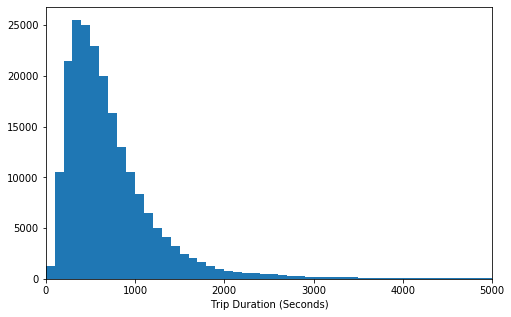

In [7]:
#Plotting histogram of trip duration
binsize = 100
bins = np.arange(0, ford.duration_sec.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = ford, x = 'duration_sec', bins = bins)
plt.xlabel('Trip Duration (Seconds)')
plt.xlim([0,5000])
plt.show()

In [8]:
#Log Normalize Right skewed data
log_binsize = 0.05
bins = 10 ** np.arange(1, np.log10(ford.duration_sec.max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = ford, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000], ['10', '30', '100', '300', '1k', '3k', '10k', '30k', '100k'])
plt.xlabel('Duration (Seconds)')
plt.show()

In [9]:
ford.duration_sec.describe()

count    210563.00000
mean        833.51472
std        1928.22378
min          61.00000
25%         376.00000
50%         593.00000
75%         914.00000
max       85492.00000
Name: duration_sec, dtype: float64

We can see that duration has has a long-tailed distribution, with many of the trips being less than 1500 seconds, and few oon the higher end. When plotting on a log-scale, the duration distribution looks normalized with the peak occuring at the mean of around 600 seconds.  

Next I'll look at the first predictor variable of interest: Trip distances

In [10]:
#Vectorize the column data
a = ford[['start_station_latitude','start_station_longitude']].values
b = ford[['end_station_latitude','end_station_longitude']].values

In [11]:
#Use geopy package to resolve longitude and latitude into miles
dist = []
for ind in range(0, len(a)):
    dist.append(geodesic(a[ind],b[ind]).miles)

In [12]:
#Create new column for distance
ford['distance'] = dist

In [13]:
#Show distance data
ford.describe().distance

count    210563.000000
mean          1.040749
std           0.658768
min           0.000000
25%           0.579278
50%           0.898188
75%           1.362370
max          41.918678
Name: distance, dtype: float64

In [14]:
#Find axes limits 
len(ford.query('distance > 6'))

9

There are only 9 trips that were greater than 6 miles. Therefore, we do not have to show them on our histogram.

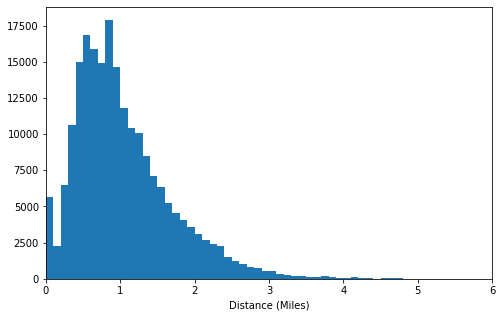

In [15]:
# start with a standard-scaled plot
binsize = 0.1
bins = np.arange(0, ford.distance.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = ford, x = 'distance', bins = bins)
plt.xlabel('Distance (Miles)')
plt.xlim([0,6])
plt.show()

Here, the distance column we added shows that most trips hover between 0.5 and 1.5 miles. The data is right skewed, which means that the mean is greater than the median. This would occur from the outliers that skew the data. There is a noticeable jump from users, that travel less than 0.1 miles to users that travel more than 0.1 miles. 

Next, I'll compare the days of the week distribution, subscriber info, and the age distribution. I'll only be looking at the start date to determine trends. I expect that more people rent the bikes on the weekdays.

In [16]:
#Convert columns to datetime
ford['start_time'] = pd.to_datetime(ford['start_time'])
ford['end_time'] = pd.to_datetime(ford['end_time'])

In [17]:
day_in_week = []
for day in ford['start_time']:
    day_in_week.append(calendar.day_name[day.weekday()])
ford['day_in_week'] = day_in_week

In [18]:
ford['day_in_week'].describe()

count       210563
unique           7
top       Thursday
freq         39472
Name: day_in_week, dtype: object

In [19]:
ford['age'] = 2019*np.ones(len(ford['member_birth_year']))-ford['member_birth_year']

In [20]:
#Investigate ages
print('-'* 40)
print(ford['age'].describe())
print('-'* 40)
print('Ages over 80')
print(len(ford.query('age > 80')))

----------------------------------------
count    170774.000000
mean         34.035550
std          10.037432
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64
----------------------------------------
Ages over 80
117


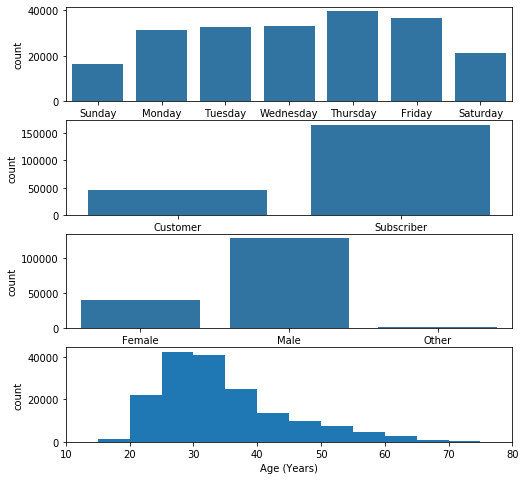

In [21]:
#Plot of other factors
binsize = 5
bins = np.arange(0, ford.member_birth_year.max()+binsize, binsize)
fig, ax = plt.subplots(nrows=4, figsize = [8,8])

default_color = sb.color_palette()[0]
sb.countplot(data = ford, x = 'day_in_week', color = default_color, ax = ax[0], order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
sb.countplot(data = ford , x = 'user_type', color = default_color, ax = ax[1])
sb.countplot(data = ford, x = 'member_gender', color = default_color, ax = ax[2])
plt.hist(data = ford, x = 'age', color = default_color, bins = bins)

#Only 117 people over age 80 using the bikes, so do not include in hist
plt.xlim([10, 80])
plt.ylabel('count')
plt.xlabel('Age (Years)')
plt.show()

In [22]:
fig, ax = plt.subplots(nrows=2, figsize = [8,8])
plt.suptitle('Most Popular Stations', fontsize=20)
start = sb.countplot(data = ford, y = 'start_station_name', color = default_color, ax = ax[0], order = ford.start_station_name.value_counts().iloc[:10].index)
start.set(ylabel = 'Start Station Name')
end = sb.countplot(data = ford, y = 'end_station_name', color = default_color, ax = ax[1], order = ford.end_station_name.value_counts().iloc[:10].index)
end.set(ylabel = 'End Station Name')


#chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')


[Text(0, 0.5, 'End Station Name')]

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
The time duration variable had a sweeping spread, so I used a log transformation to normalize the data. When transformed, the right skewed data turned into a plot that resembled a normal distribution with a higher concentration of points around the mean of 833.5 s. 


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The most interesting feature was the distance between the stations. Here, there is another right skewed plot with less of a tail. I attempted to log transform the data, but didn't find a clean working set. It is interesting because most of the trips hover around 0.75 miles, and tend to drop off considerably as the duration increases. I found a few outliers, but since there were so few, I plotted, the distributions without them. I didn't drop them from the dataset because they're in fact real data points. 

Other features such as the days of the week, age, gender, and subscriber class were all straightforward. Little cleaning was necessary outside of changing the axes limits. 

Finally, I looked at the 10 most popular stations to determine where most people were renting and returning. This was just a standard plot as well. The only tidying I had to do was to filter the most popular stations from the list. 

## Bivariate Exploration

Here I want to look at pairwise correlations between certain features in the data

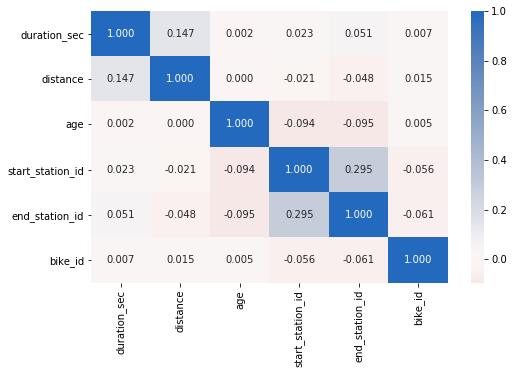

In [23]:
var = ['duration_sec','distance', 'age', 'start_station_id', 'end_station_id', 'bike_id']
plt.figure(figsize = [8,5])
sb.heatmap(ford[var].corr(), annot = True, fmt = '.3f', 
           cmap = 'vlag_r', center=0)
plt.show()

/Users/nicholaslucasti/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/nicholaslucasti/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


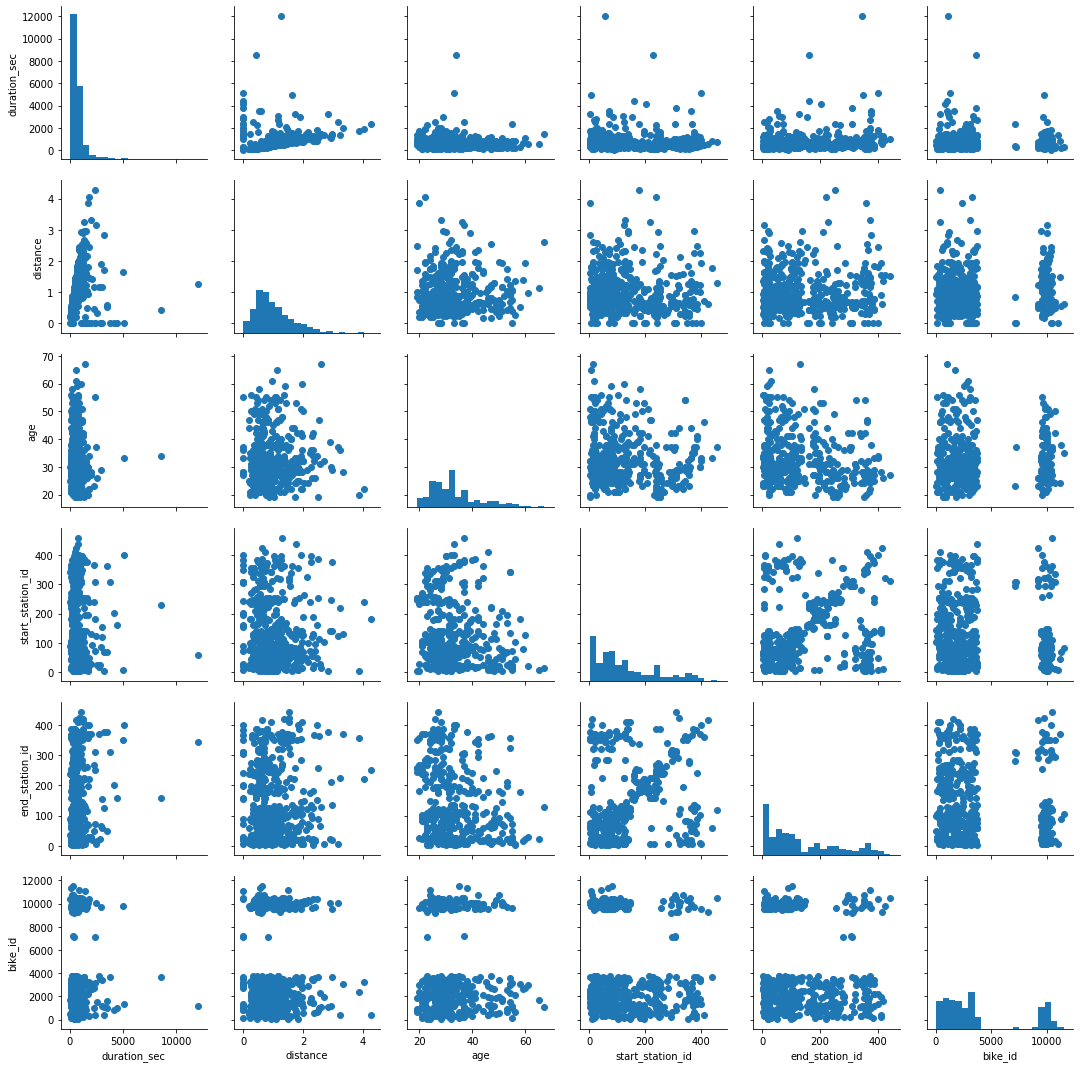

In [24]:
#Sample of 500 trips to determine correlation
samples = np.random.choice(ford.shape[0], 500, replace = False)
ford_samp = ford.loc[samples,:]

g = sb.PairGrid(data = ford_samp, vars = var)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

This plot doesn't show much in terms of correlations. Many of the data points of this data set show weak correlation. The only one that should be noted is that duration is weakly correlated with distance as expected.

/Users/nicholaslucasti/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 864x864 with 0 Axes>

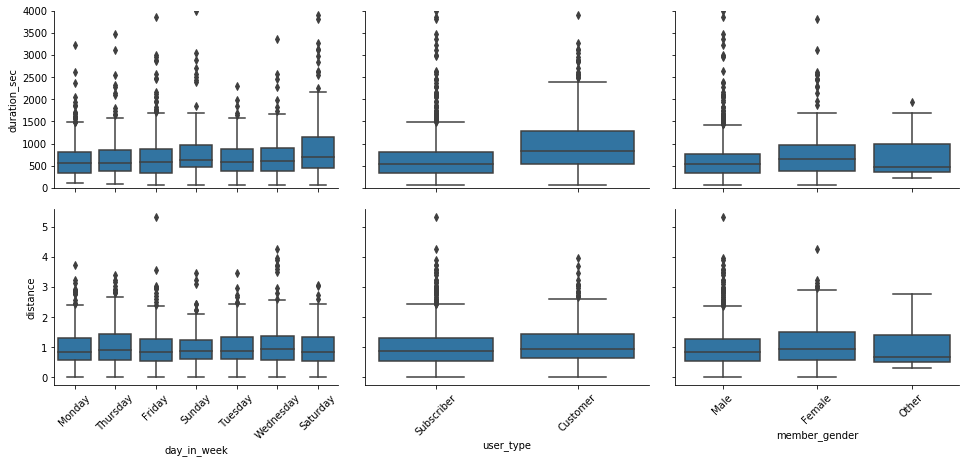

In [25]:
samples = np.random.choice(ford.shape[0], 2000, replace = False)
ford_samp = ford.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [12, 12])
g = sb.PairGrid(data = ford_samp, y_vars = ['duration_sec', 'distance'], x_vars = ['day_in_week', 'user_type', 'member_gender'],
                size = 3, aspect = 1.5)
g.axes[0,0].set_ylim(0,4000)
g.axes[0,1].set_xlim(0,4)
g.map(boxgrid)
[plt.setp(ax.get_xticklabels(), rotation=45) for ax in g.axes.flat]
plt.show();

Here, we see that despite there being less female subscribers, women were more likely to bike longer distances and durations than men. We also see the same trend among customers vs. subscribers. 

Days of the week were interesting, so I will highlight them in in the following plot.

/Users/nicholaslucasti/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 864x864 with 0 Axes>

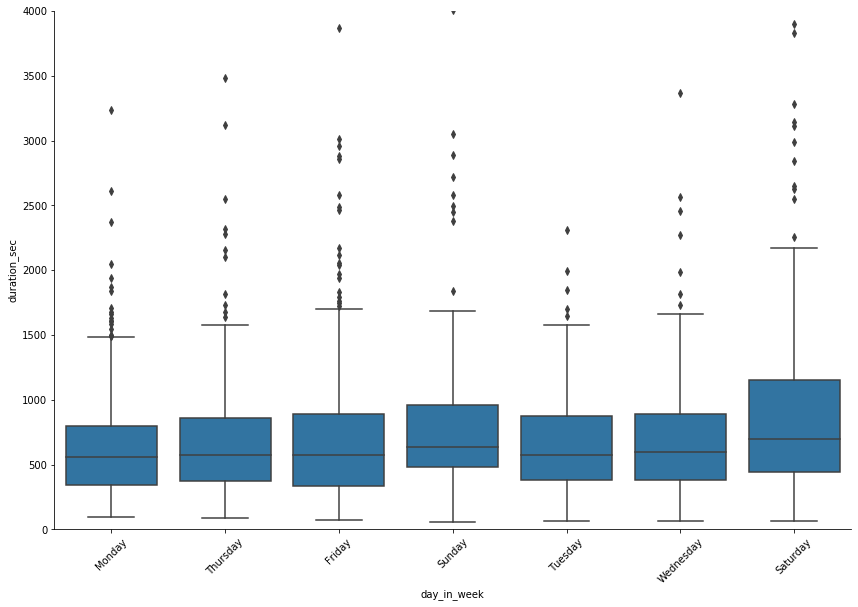

In [26]:
plt.figure(figsize = [12, 12])
g = sb.PairGrid(data = ford_samp, y_vars = ['duration_sec'], x_vars = ['day_in_week'],
                size = 8, aspect = 1.5)
g.axes[0,0].set_ylim(0,4000)
g.map(boxgrid)
[plt.setp(ax.get_xticklabels(), rotation=45) for ax in g.axes.flat]
plt.show();

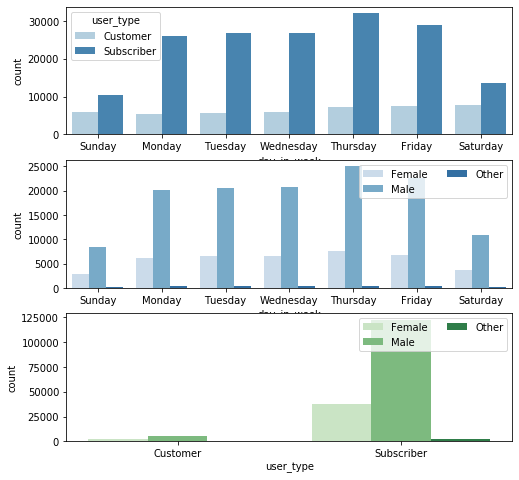

In [27]:
plt.figure(figsize = [8, 8])

plt.subplot(3, 1, 1)
sb.countplot(data = ford, x = 'day_in_week', hue = 'user_type', palette = 'Blues',order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

ax = plt.subplot(3, 1, 2)
sb.countplot(data = ford, x = 'day_in_week', hue = 'member_gender', palette = 'Blues',order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

ax = plt.subplot(3, 1, 3)
sb.countplot(data = ford, x = 'user_type', hue = 'member_gender', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

From the plots, it seems that all users have a particular affinity for bike rentals on thursday and friday, with a huge drop off on the weekends. It does seem that men have a larger jump of rentals on Thursday and Friday, however. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

It was noticed that the duration of trips was higher for females than for males. It was also noted that customers generally took longer on trips than subscribers. This is likely because subscribers are more likely to rent the bike for shorter/commute-type trips.

It was also noted that certain days had a considerable correlation with durations in trips. Saturday and Sunday had considerable jumps in trip duration. The mean of these days jumped by a couple hundred seconds in both cases. So it seems that despite customers taking less trips on the weekends, users are taking longer trips.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

There was an expected correlation between start stations and end stations as well as between age and stations. These can be likely explained by the amount of foot traffic as well as th demographics in the area. None of these had correlations with duration so they were not explored. 

## Multivariate Exploration

I mainly want to explore how member gender, day of the week, and user info relate to trip distance and duration. 

In [28]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_x = np.arange(0, 6, .25)
    bins_y = np.arange(0, 2000, 10)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)
    #plt.xticks(cuberoot_trans(np.array(carat_ticks)), carat_ticks)
    #plt.yticks(log_trans(np.array([500, 1e3, 2e3, 5e3, 1e4, 2e4])),
     #          [500, '1k', '2k', '5k', '10k', '20k'])
        

In [29]:
g = sb.FacetGrid(data = ford, col = 'day_in_week', col_wrap = 3, size = 3)
g.map(hist2dgrid, 'distance', 'duration_sec', color = 'inferno_r')
g.set_xlabels('Distance (miles)')
g.set_ylabels('Duration (s)')

plt.show()

/Users/nicholaslucasti/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


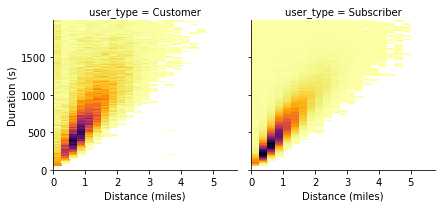

In [30]:
g = sb.FacetGrid(data = ford, col = 'user_type', col_wrap = 3, size = 3)
g.map(hist2dgrid, 'distance', 'duration_sec', color = 'inferno_r')
g.set_xlabels('Distance (miles)')
g.set_ylabels('Duration (s)')

plt.show()

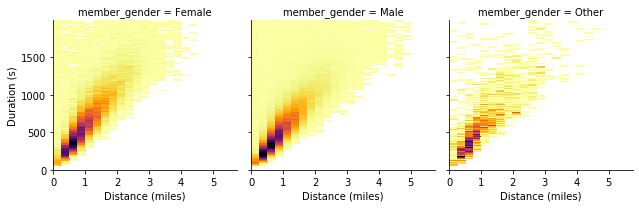

In [31]:
g = sb.FacetGrid(data = ford, col = 'member_gender', col_wrap = 3, size = 3)
g.map(hist2dgrid, 'distance', 'duration_sec', color = 'inferno_r')
g.set_xlabels('Distance (miles)')
g.set_ylabels('Duration (s)')

plt.show()

I want to further examine the effect of gender and day of the week on trip duration.

In [32]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = ford, x = 'day_in_week', y = 'duration_sec', hue = 'member_gender',
           palette = 'Blues', linestyles = '', dodge = 0.4,
                 order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday'])
plt.title('Trip Durations Across Gender and Day')
plt.ylabel('Mean Duration (s)')
ax.set_yticklabels([],minor = True)
plt.show();

This plot clearly shows the influence of day and gender on the duration of a trip. Women generally bike for much longer than mean. 

Similarly, we will look at distance.

In [33]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = ford, x = 'day_in_week', y = 'distance', hue = 'member_gender',
           palette = 'Blues', linestyles = '', dodge = 0.4,
                 order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday'])
plt.title('Trip Distance Across Gender and Day')
plt.ylabel('Mean Distance (miles)')
ax.set_yticklabels([],minor = True)
plt.show();

Notice that there is a decline in distance throughout the week, while the duration increases on the weekend. Still, however, women are biking further than men.

Now I will look at affect of user type on distance and duration.

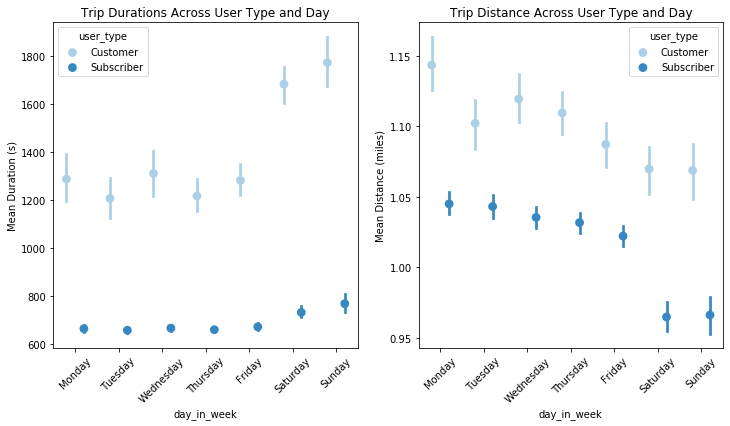

<Figure size 576x432 with 0 Axes>

In [34]:
fig, ax = plt.subplots(ncols = 2, figsize = [12,6])


fig = plt.figure(figsize = [8,6])
chart1= sb.pointplot(data = ford, x = 'day_in_week', y = 'duration_sec', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4, ax = ax[0],
                 order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday'])
ax[0].set_title('Trip Durations Across User Type and Day')
ax[0].set_ylabel('Mean Duration (s)')
ax[0].set_yticklabels([],minor = True)
ax[0].set_xticklabels(chart1.get_xticklabels(),rotation = 45)

chart2 = sb.pointplot(data = ford, x = 'day_in_week', y = 'distance', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4, ax = ax[1],
                 order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday'])
ax[1].set_title('Trip Distance Across User Type and Day')
ax[1].set_ylabel('Mean Distance (miles)')
ax[1].set_yticklabels([],minor = True)
ax[1].set_xticklabels(chart2.get_xticklabels(),rotation = 45)

plt.show();


Again, a strong signal that subscribers take shorter, more focused trips, likely to work. While customers likely are on vacation or just touring the city, so they travel at a slower pace.

In [35]:
ford.to_csv('ford_updated.csv')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended the investigation of duration against day by looking at some of the other categorical variables. The investigation shows that there is indeed a correlation between the day in week and the user type. Here, we see customers having a massive jump in trip duration on the weekends. Subscribers, on the other hand, decrease the distance traveled on the weekend. This data correlates well with expected outcomes of travel and tourism. I think an interesting factor was that the trip durations for women also increased dramatically on the weekend while distance did not. This suggests more leisurely travel. 

### Were there any interesting or surprising interactions between features?
I think the most interesting interactions were these trends showing how user type and gender had large impacts on the outcomes. I also found it interesting that the shape of the user type dots stayed fairly similar throughout the week for the subscriber base which suggests low variance.